In [ ]:
#imporing necessary libraries
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/melanoma.csv")

In [ ]:
df.head()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
0,1,10,3,1,76,1972,6.76,1
1,2,30,3,1,56,1968,0.65,0
2,3,35,2,1,41,1977,1.34,0
3,4,99,3,0,71,1968,2.90,0
4,5,185,1,1,52,1965,12.08,1


In [ ]:
df.describe()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,2152.800000,1.790244,0.385366,52.463415,1969.907317,2.919854,0.439024
std,59.322565,1122.060667,0.551204,0.487873,16.671711,2.575563,2.959433,0.497483
min,1.000000,10.000000,1.000000,0.000000,4.000000,1962.000000,0.100000,0.000000
25%,52.000000,1525.000000,1.000000,0.000000,42.000000,1968.000000,0.970000,0.000000
50%,103.000000,2005.000000,2.000000,0.000000,54.000000,1970.000000,1.940000,0.000000
75%,154.000000,3042.000000,2.000000,1.000000,65.000000,1972.000000,3.560000,1.000000
max,205.000000,5565.000000,3.000000,1.000000,95.000000,1977.000000,17.420000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  205 non-null    int64  
 1   time        205 non-null    int64  
 2   status      205 non-null    int64  
 3   sex         205 non-null    int64  
 4   age         205 non-null    int64  
 5   year        205 non-null    int64  
 6   thickness   205 non-null    float64
 7   ulcer       205 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.9 KB


# *Feature selection using filter method*

In [ ]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
#chacking for unique values in a column .If there's only one value in a column , we can delete that column
df.nunique()

time         194
status         3
sex            2
age           70
year          13
thickness     64
ulcer          2
dtype: int64

In [ ]:
print(df.apply(lambda col: col.unique()))

time         [10, 30, 35, 99, 185, 204, 210, 232, 279, 295,...
status                                               [3, 2, 1]
sex                                                     [1, 0]
age          [76, 56, 41, 71, 52, 28, 77, 60, 49, 68, 53, 6...
year         [1972, 1968, 1977, 1965, 1971, 1974, 1969, 197...
thickness    [6.76, 0.65, 1.34, 2.9, 12.08, 4.84, 5.16, 3.2...
ulcer                                                   [1, 0]
dtype: object


In [ ]:
#checking the variance of the df. If variace=0, it is a constant value. we can drop that feature.
df.var()

time         1.259020e+06
status       3.038259e-01
sex          2.380201e-01
age          2.779460e+02
year         6.633525e+00
thickness    8.758242e+00
ulcer        2.474892e-01
dtype: float64

In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

## #filter features by correlation

In [ ]:
#we keep only one feature in the dataset if two features are highly correlated.
df.corr()

,time,status,sex,age,year,thickness,ulcer
time,1.000000,0.316146,-0.146499,-0.301518,-0.485504,-0.235409,-0.264757
status,0.316146,1.000000,-0.098967,0.015964,0.138167,-0.204722,-0.270326
sex,-0.146499,-0.098967,1.000000,0.068337,-0.002645,0.185413,0.167979
age,-0.301518,0.015964,0.068337,1.000000,0.188229,0.212480,0.126063
year,-0.485504,0.138167,-0.002645,0.188229,1.000000,-0.133345,-0.033126
thickness,-0.235409,-0.204722,0.185413,0.212480,-0.133345,1.000000,0.424459
ulcer,-0.264757,-0.270326,0.167979,0.126063,-0.033126,0.424459,1.000000


In [ ]:
correlated_features = set()
correlation_matrix = df.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

0

In [ ]:
correlated_features

set()

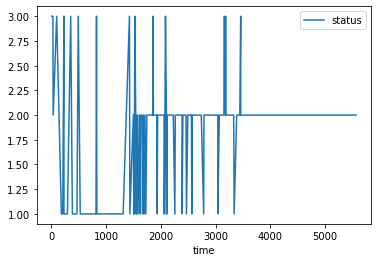

In [ ]:
df.plot(x='time',y='status')